In [3]:
import glob
import os
import sys
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pickle
%matplotlib inline 

In [4]:
def plot_spec(spec, spec_type):
    plt.figure(figsize=(10, 4))
    if spec_type=='MFCC':
        librosa.display.specshow(spec, x_axis='time')
        plt.colorbar()
        plt.title('MFCC')
    
    elif spec_type=='MPEC':
        librosa.display.specshow(spec, y_axis='mel', fmax=8000, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
    
    else:
        raise Exception("Invalid Spec Type [MFCC/MPEC]")
    plt.show()

In [7]:
def extract_features(basedir, extension='.mp3', spec_size=(128, 644), spec_type='MFCC', plot=False):
    """
    [FMA] 
    Iterate through every file in the dataset, extract features.
    INPUTS:
        basedir: dir of the dataset
        extension: file suffix for audio data
    """
    features=[]
    labels=[]
    
    # iterate over all files in all subdirectories of the base directory
    for root, dirs, files in os.walk(basedir):
        # Match all *.au files 
        files = glob.glob(os.path.join(root,'*' + extension)) 
        
        if files:
            # root -> "../data/fma_small/000
            subset = root.split('/')[-1]
            print("Subset: [{}]".format(subset))
            
            for f in files :
                # Load get sample and sample rate (can request sample rate if needed)
                y, sr = librosa.load(f) 

                if spec_type=='MFCC':
                    mel_spec = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)

                elif spec_type=='MPEC':
                    # Create mel-scaled power (energy-squared) spectrogram
                    mel_spec = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, hop_length=1024, n_fft=2048)

                    # Convert to log scale (dB). We'll use the peak power as reference.
                    mel_spec = librosa.amplitude_to_db(mel_spec, ref=np.max)
                else:
                    raise Exception("Invalid Spec Type [MFCC/MPEC]")


                # Plot the Mel Spectrogram / MFCCs
                if plot:
                    plot_spec(mel_spec, spec_type)

                # make dimensions of the array even 128 x 644
                mel_spec = np.resize(mel_spec, spec_size)

                #store into feature array
                features.append(mel_spec.flatten())

                # Extract label
                # TODO
                    
    
    # [len(features), 128*644]
    features = np.asarray(features).reshape(len(features), np.multiply(*spec_size))

    return features

Subset: [024]


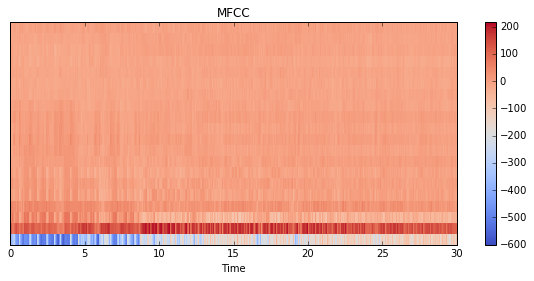

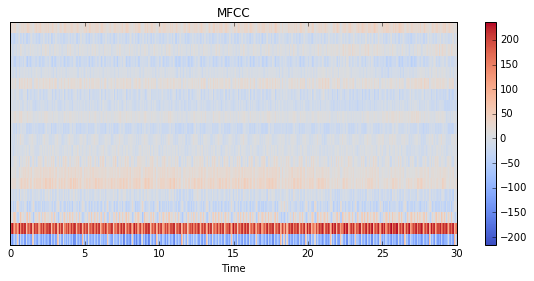

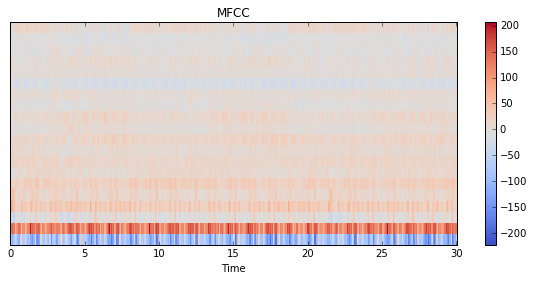

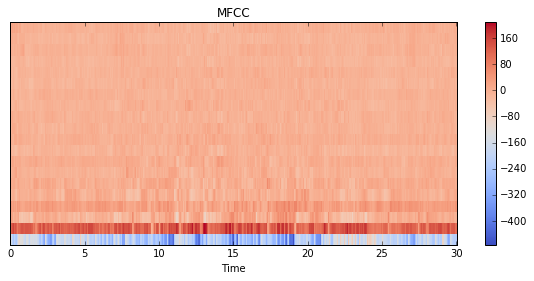

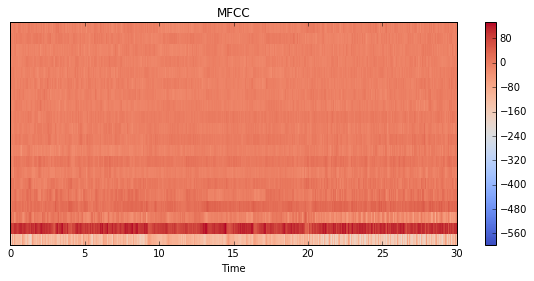

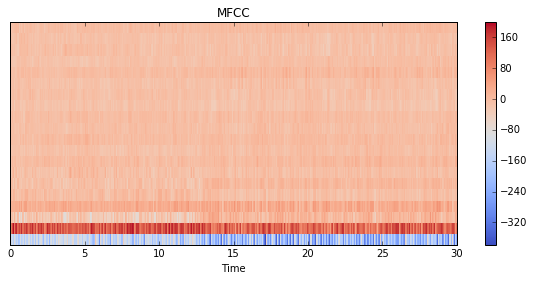

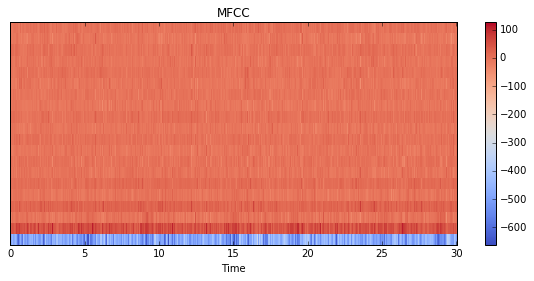

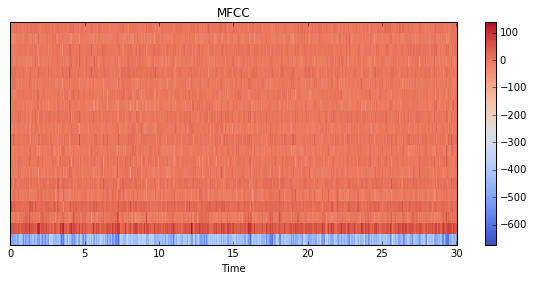

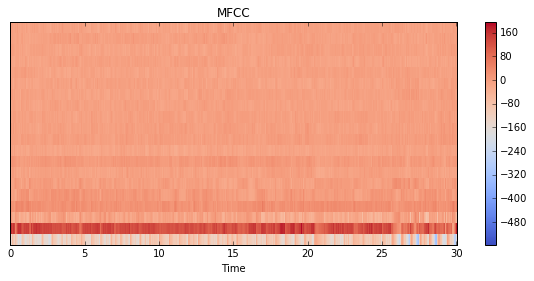

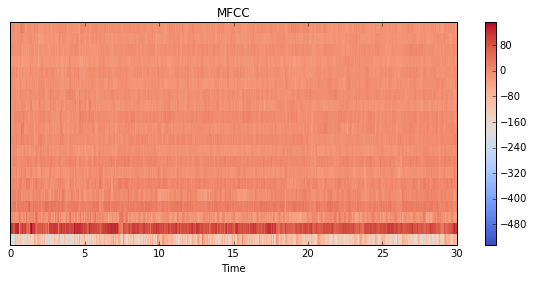

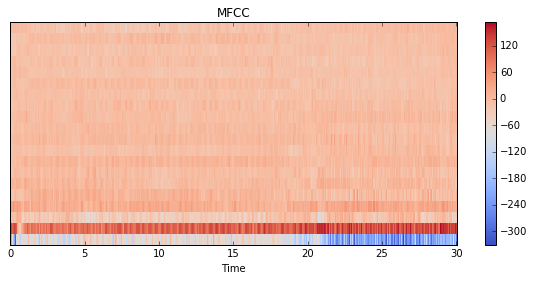

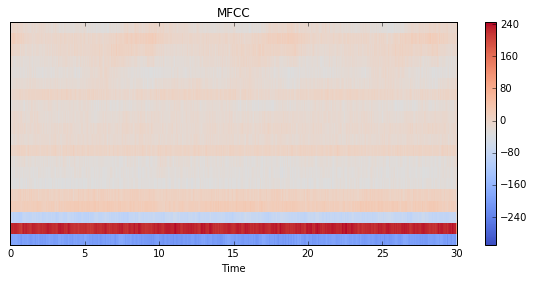

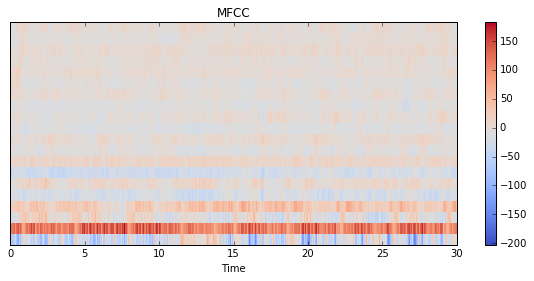

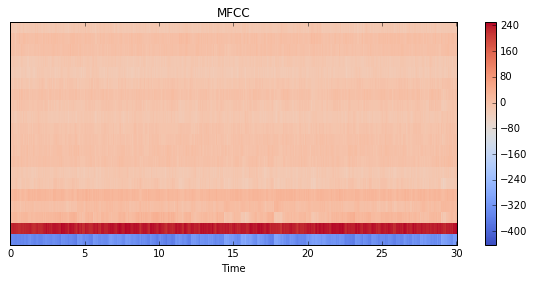

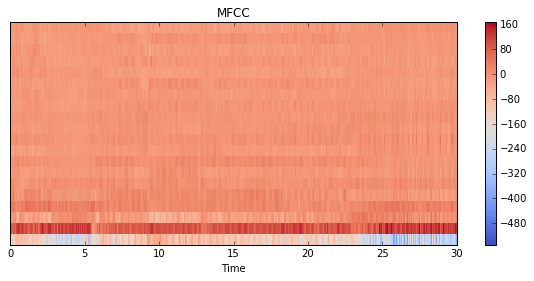

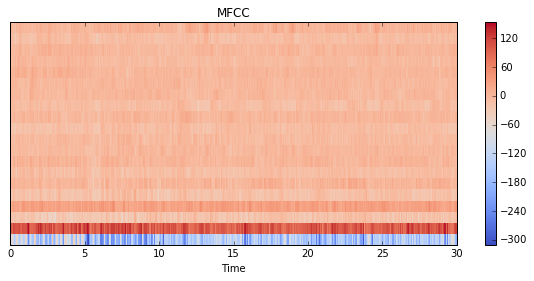

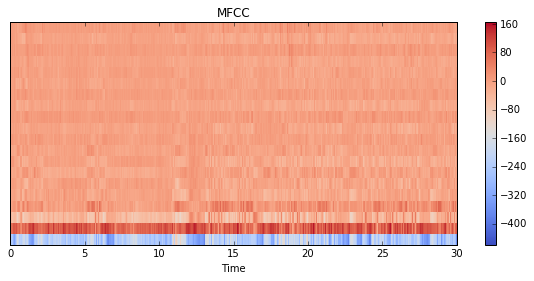

KeyboardInterrupt: 

In [8]:
trainingPath = '../data/fma_small'
train_data, train_labels = extract_features(trainingPath, plot=True)

In [ ]:
# store preprocessed data in serialised format so we can save computation time and power
with open('../../Audio.data', 'w') as f:
    pickle.dump(train_data, f)

with open('../../Audio.labels', 'w') as f:
    pickle.dump(train_labels, f)